# IMDB Sentiment Analysis - SimpleRNN

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # Number of words considered as features
maxlen = 500         # Keep first 500 words in each comment
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print("Number of train sequences:", len(input_train), "; Shape:", input_train.shape)
print("Number of test sequences:", len(input_test), "; Shape:", input_test.shape)

Number of train sequences: 25000 ; Shape: (25000, 500)
Number of test sequences: 25000 ; Shape: (25000, 500)


In [6]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128, 
    validation_split=0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6449 - acc: 0.6164 - val_loss: 0.4842 - val_acc: 0.7938
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4242 - acc: 0.8155 - val_loss: 0.4134 - val_acc: 0.8198
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3141 - acc: 0.8729 - val_loss: 0.3799 - val_acc: 0.8330
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2491 - acc: 0.9039 - val_loss: 0.3721 - val_acc: 0.8500
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.2046 - acc: 0.9236 - val_loss: 0.3655 - val_acc: 0.8690
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1622 - acc: 0.9403 - val_loss: 0.4427 - val_acc: 0.8408
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1157 - acc: 0.9594 - val_loss: 0.4082 - val_acc:

<Figure size 432x288 with 0 Axes>

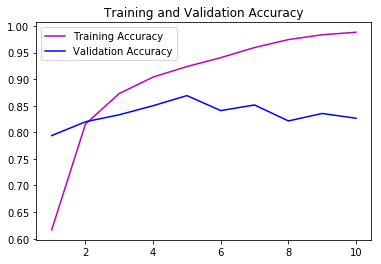

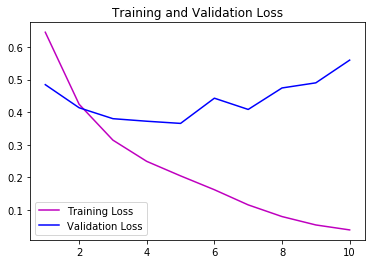

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

history = history.history
acc, val_acc, loss, val_loss = history['acc'], history['val_acc'], history['loss'], history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'm', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'm', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()